<center>

## <font color='blue'>ASTR 21100</font>
<center>

### <font color='blue'>"Computational Techniques in Astrophysics"</font>
    
<center>
    
### <font color='blue'> Planets, their orbits, and their effect on the motion of their star</font>

<center>
    
### <font color='blue'> 23 points (+ 5 possible extra-credit points)</font>
    
    
<center>

### <font color='blue'> Due Thursday day,  Jan 18, 10pm</font>



### Introduction

This assignment consists of two explorations in two exercises. 
In the exercise 1, you will implement and test your own $N$-body integrator. After this, you can choose to do either exercise 2 or 3 or do both for extra-credit (if you do both you will get 5 points extra credit, not 8, because a similar plotting code should be written in both and it can be reused for both exercises). If you cannot get your N-body integration code to work, one can be provided to you so that you can do exercise 1b, 2 or 3 (contact professor in this case). 

In the exercise 2 the task is to explore which planets in our Solar system could potentially be detectable, if such planet orbited around another star of Sun's mass and to examine what signatures effects of pull from multiple planets would have on the Sun's velocity oscillations. 

In the exercise 3 you will use your $N$-body integrator to model orbits of 2 planets detected in the [exoplanet system Gliese 876](https://planet.fandom.com/wiki/Gliese_876). This star has more than 2 planets, but the most massive of these pull on the star causing its radial velocity (velocity along our line-of-sight) to oscillate with a distinct pattern. Your goal is to reproduce this pattern, thereby reproducing key figures (Figure 1 and Figure 2) in the paper by [Laughlin et al. 2005](https://ui.adsabs.harvard.edu/abs/2005ApJ...622.1182L/abstract).

<p>
<center>
<img width=500 src="https://vignette.wikia.nocookie.net/planetpedia/images/9/9a/Gliese_876_b.jpg/revision/latest/scale-to-width-down/2000?cb=20110512032028"></img>

Import NumPy and Matplotlib, change Matplotlib defaults to produce nicer plots. 

In [1]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline

# the following commands make plots look better
def plot_prettier(dpi=150, fontsize=11, usetex=False): 
    '''
    Make plots look nicer compared to Matplotlib defaults
    Parameters: 
        dpi - int, "dots per inch" - controls resolution of PNG images that are produced
                by Matplotlib
        fontsize - int, font size to use overall
        usetex - bool, whether to use LaTeX to render fonds of axes labels 
                use False if you don't have LaTeX installed on your system
    '''
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    if usetex:
        plt.rc('text', usetex=usetex)
    else:
        plt.rcParams['mathtext.fontset'] = 'cm'
        plt.rcParams['font.family'] = 'serif'
        plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plot_prettier()

### <font color='darkblue'>1  (15 points).  Implementing code for $N$-body integration

**1a (12 points).** Implement a function that carries out integrations of $N$-body dynamics of $N$ particles using the Kick-Drift (KD) update scheme. The function should take as input  initial coordinates and velocities of $N$ particles and evolves them forward using a specified constant time step for some input number of steps. You can use cgs unit system and examples provided in the distributed notebooks.
    
This function should also take as input the name of a function that computes accelerations for every particle using coordinates. This function should be called inside the $N$-body code to compute accelerations at each step. 
    
Here is a suggested format for the function inputs and outpus (you can choose your own). 
    
    def nbody_integrate(x, v, mp, dt=None, nsteps=None, acc_func=None):
        """
        integrate equations of motions starting from the input vectors x, v, mp
        for nsteps with constant time step dt
        
        Parameters: 
        ------------
        
        x, v- NumPy vectors of floats of shape (N,3) containing
             coordinates and velocities of N particles 
        mp - NumPy vector of masses of particles of length N
        dt - float
            step size
        acc_func  - python function
            name of a user-supplied function to compute mutual accelerations of particles
            and/or accelerations from an external potential
        
        Returns:
        -----------------
        tt - numpy float vector
            recorded orbit times
        xt, vt - numpy float vectors
            coordinates, velocities at times tt 
         

    """
    
 
**1b. (3 points)** Test your function by integrating a two body system with the Sun and the Earth with their true masses (see code snippet below) positions and velocities. The code below shows how to select solar masses, cartesian coordinates, and velocities of the Sun and major planets (and Pluto). These are their actual values at midnight on Nov 20, 2014 and were obtained from the [NASA's Horizon service](http://ssd.jpl.nasa.gov/horizons.cgi). The coordinate system is such that the plane of the solar system has $z=0$.    
    
***Hint:*** write your code in such a way that it is easy to change the Earth to any other planet in the solar system, if you plan to do exercise 2. 
    
Specifically, 1) plot the distance of the Earth from the Sun and make sure that on average it does not increase or decrease systematically but only changes oscillatorily during each orbital period; 2) compute the smallest and largest distances $r_{\rm min}$ and $r_{\rm max}$ from the Earth to the Sun using the array of distances. This is straigtforward if the distances are in a NumPy array and you can use min and max methods of the arrays: <tt>r.min()</tt> and <tt>r.max()</tt>. Compute the eccentricity of the Earth orbit (eccentricity is 0 for the circular orbit and is 1 for a straight line orbit):

$$e = \frac{1-r_{\rm min}/r_{\rm max}}{1+r_{\rm min}/r_{\rm max}}$$

Print out $r_{\rm min}/r_{\rm max}$ and $e$ that you obtain. Note that the Earth orbit is pretty close to circular, but is not exactly circular. If you integrate correctly and use sufficiently small step size, you should obtain $e\approx 0.017$.


#### Additional info and hints: 
The evolution code should consist of a loop stepping in time.
For each particle acceleration is computed by direct summation of forces from all other particles and use it to advance positions of particles. Thus, to compute acceleration for all particles one has to have two loops over particles (which is whay computational time (complexity) of this calculation scales as $O(N^2)$). 

**Note:** The second loop during step can be done via NumPy operation without an explicit loop straightforwardly using <tt>np.sum</tt>. It is less straightforward, but both loops in computation of accelerations for all $N$ particles can be removed using NumPy operations. I encourage you to try getting rid of the second or both inner loops in computation of accelerations using NumPy operations. In other word it is possible to compute all accelerations for all $N$ particles without loops using NumPy at the beginning of each step. It is also possible to do all of the coordinate and velocity updates without a loop over the number of particles using NumPy so that only the outer loop over the number of steps is present (this loop cannot be removed because subsequent steps depend on the previous steps and updates cannot be done in parallel. I recommend attempting doing optimizations with NumPy after you get code working with a function computing accelerations using loops or whatever form of code that you are most comfortable with.  

**Note:** Use of Python classes is useful for this problem. If you feel comfortable with using classes you are encouraged you to try their use for this problem. This is a good opportunity to practice class programming. If you want to go this route, we'll be happy to provide guidance and give pointers.  



In [2]:
AU = 1.49598e+13 # 1 AU = average distance from the Earth to the Sun in centimeters (cm)
G = 6.67259e-08 # universal gravitational constant in cgs units 
yr =  3.15569e+07 # 1 year in seconds
day = 24*60*60



In [3]:

def acc_nbody (x, m, G = 6.67259e-08):
    
    n = x[:,0].size 
    acc = np.zeros_like(x)
    r = np.zeros_like(x)
    for i in range(n):
        for j in range(n):
            if j != i:
                diffx = (x[j,0] - x[i,0])
                diffy = (x[j,1] - x[i,1])
                diffz = (x[j,2] - x[i,2])
                r = np.sqrt(diffx**2 + diffy**2 + diffz**2)
                acc[i,0] += m[j]*diffx/r**3
                acc[i,1] += m[j]*diffy/r**3
                acc[i,2] += m[j]*diffz/r**3
                
    return acc * G



In [4]:
def nbody_integrate(x, v, mp, dt=None, nsteps=None, acc_func=None):
        n = x.shape[0]
        xt = np.empty((nsteps, n, 3))
        vt = np.empty((nsteps, n, 3))
        tt = np.empty((nsteps))
        t = 0
        
#using kick drift scheme --> from 2 body problem
        for n in range(nsteps):

            a = acc_nbody(x, m, G = 6.67259e-08)
    
            # Update velocity and position using the KD scheme
            v += a * dt
            x += v * dt
            
            # Update time
            
            t += dt
            xt[n] = x
            vt[n] = v
            tt[n] = t

        return tt,xt,vt 

   

In [5]:
#nsteps = 10
#n =2
#xt = np.empty((nsteps, n, 3))
#print(xt[0].shape)

In [6]:
def read_solsys_bodies(plist = []):
    """
    Read solar system planets in the input list plist, in which these names are expected
    as strings: 'Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 
                'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto' 
    Parameters: 
        plist: list of strings with the names of solar system bodies in the list above
    Returns:
        nested dictionary, containing mass (in g), x, y, z (in cm), vx, vy, vz (in cm/s)
        for each name in the input plist 
    """
    index_dict = {'Sun': 9, 'Mercury': 0, 'Venus': 1, 'Earth': 2, 'Mars': 3, 
                  'Jupiter': 4, 'Saturn': 5, 'Uranus': 6, 'Neptune': 7, 'Pluto': 8}
    
    data_file = 'https://astro.uchicago.edu/~andrey/classes/a211/data/planets.dat'
    # read planet names into array name
    name = np.loadtxt(data_file, usecols=[0], unpack=True, dtype=str)
    # read planet initial positions and velocities
    mp, xp, yp, zp, vxp, vyp, vzp = np.loadtxt(data_file, usecols=(1,2,3,4,5,6,7), unpack=True)

    AU = 1.49598e+13 # average distance of the Earth to the Sun in cm
    msun = 1.9891e33 # mass of the Sun in grams
    aupd = AU / (24*3600.) # AU/day for velocity unit conversion
    
    out_dict = {}
    for name in plist:
        assert(name in index_dict) # check if input name is legit
        ip = index_dict[name]
        out_dict[name] = {'mass': mp[ip]*msun, 'x': xp[ip]*AU, 'y': yp[ip]*AU, 'z': zp[ip]*AU,
                          'vx':  vxp[ip]*aupd, 'vy': vyp[ip]*aupd, 'vz': vzp[ip]*aupd}

    return out_dict

In [7]:
print(read_solsys_bodies(['Sun']))

{'Sun': {'mass': 1.9891e+33, 'x': 39917913421.9347, 'y': -16003290788.816149, 'z': -1990530059.6340642, 'vx': 736.7119031423207, 'vy': 862.758621618077, 'vz': -17.585500871988877}}


Example of how to read mass and initial coordinate and velocity components of the Sun and planet(s). The possible input names to the function `read_solsys_bodies` are: `'Sun', 'Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto'`

In [8]:
# this will extract initial conditions for the Sun, Mercury and Earth
out = read_solsys_bodies(plist = ['Sun', 'Mercury', 'Earth'])
# to select just Sun and Earth use: 
# plist = ['Sun', 'Earth']

# return out is a nested dictionary. For example, we can extract the mass (in g)
# initial x, y, z (in cm) and vx, vy, vz (in cm/s) for the Earth like this: 
m = out['Earth']['mass']
mmsun = m / out['Sun']['mass'] # in units of Msun)
x, y, z = out['Earth']['x'], out['Earth']['y'], out['Earth']['z']
vx, vy, vz = out['Earth']['vx'], out['Earth']['vy'], out['Earth']['vz']

print('Mass, initial position and velocity of the Earth:')
print(f'm = {m:.4e} g = {mmsun:.4e} Msun')
print(f'x, y, z = {x/AU:.4f}, {y/AU:.4f}, {z/AU:.4e} AU ')
print(f'vx, vy, vz = {vx/1e5:.4f}, {vy/1e5:.4f}, {vz/1e5:.4e} km/s ')

Mass, initial position and velocity of the Earth:
m = 6.0477e+27 g = 3.0404e-06 Msun
x, y, z = 0.5355, 0.8312, -1.6211e-04 AU 
vx, vy, vz = -25.5704, 15.9687, -1.7229e-03 km/s 


In [9]:
bodies  = ['Sun', 'Earth']
x,v = np.empty((2,3)), np.empty((2,3))
m = np.empty((2))

for i,b in enumerate (bodies):
    x[i,0] = out[b]['x']
    x[i,1] = out[b]['y']
    x[i,2] = out[b]['z']
    v[i,0] = out[b]['vx']
    v[i,1] = out[b]['vy']
    v[i,2] = out[b]['vz']
    m[i] = out[b]['mass']

#for every component of x, vx, and m 
#v = out['Sun']['vx'], out['Sun']['vy'], out['Sun']['vz'], out['Earth']['vx'], out['Earth']['vy'], out['Earth']['vz']
dt = 0.1*day
tend = 10*365.24*day
nsteps = int(tend/dt)
times, pos, velos= nbody_integrate(x,v,m,dt,nsteps, acc_nbody(x,m,G = 6.67259e-08))
#print(times.shape)


In [10]:
#x = pos[:,1,0]
#y = pos[:,1,1]

r = ((pos[:,0,0]-pos[:,1,0])**2+(pos[:,0,1]-pos[:,1,1])**2+(pos[:,0,2]-pos[:,1,2])**2)**0.5
rmin = np.min(r)
rmax = np.max(r)
e = (1-(rmin/rmax))/(1+(rmin/rmax))
print('Eccentricity:', e)

tmin,tmax = np.min(times), np.max(times)
vmin,vmax = np.min(velos), np.max(velos)

Eccentricity: 0.01764828700750686


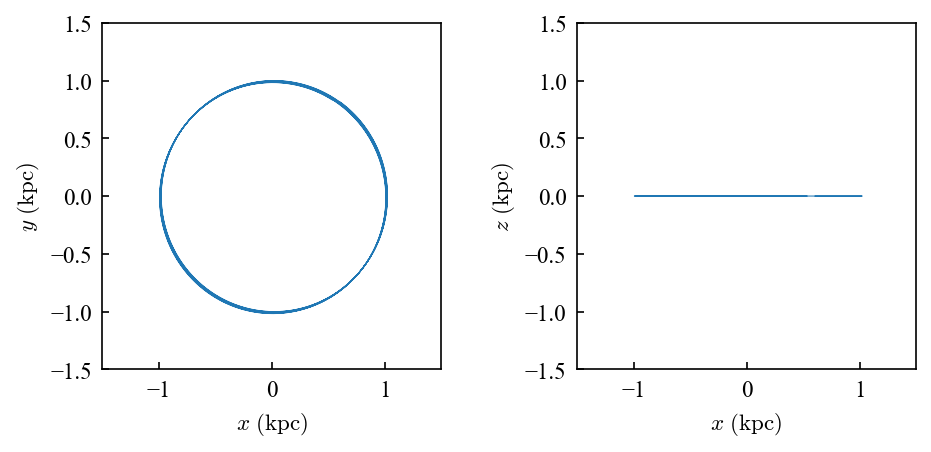

In [11]:


def plot_traj_xy_xz(xt, xlab1='$x$', ylab1='$y$', xlab2='$x$', ylab2='$z$', lw=0.5, 
                    xlims=[-1.1, 1.1], ylims=[-1.1, 1.1], xlims2=None, ylims2=None, figsize=(7,3)):
    '''
    Helper function to plot trajectory in the x-y and x-z projections using Matplotlib 
    
    Parameters: 
        xt - arrays of coordinates [shape (nsteps,3)] to plot
        lw - controls width of the plotted lines (must be >0)
    Returns: None
    '''
    fig, ax = plt.subplots(1, 2, figsize=figsize) # define sub-panels
    fig.subplots_adjust(wspace=0.4)

    ax[0].plot(xt[:,0], xt[:,1], lw=lw)
    ax[0].set_xlim(xlims) # set x, and y axes limits 
    ax[0].set_ylim(ylims)
    ax[0].set_ylabel(ylab1) # add labels to axes
    ax[0].set_xlabel(xlab1)

    ax[1].plot(xt[:,0], xt[:,2], lw=lw)
    if xlims2 is None: 
        ax[1].set_xlim(xlims) # set x, and y axes limits 
    else:
        ax[1].set_xlim(xlims2)
    if ylims2 is None: 
        ax[1].set_ylim(ylims) # set x, and y axes limits 
    else:
        ax[1].set_ylim(ylims2)

    ax[1].set_xlabel(xlab2)
    ax[1].set_ylabel(ylab2)
    plt.show()
    
plot_traj_xy_xz(pos[:,1]/AU, xlab1=r'$x\rm\ (kpc)$', ylab1=r'$y\rm\ (kpc)$', 
                 xlab2=r'$x\rm\ (kpc)$', ylab2=r'$z\rm\ (kpc)$', 
                    xlims=[-1.5,1.5], ylims=[-1.5,1.5])


### <font color='blue'>2. (8 points) Which planets of the Solar system would be detectable if we observed them around another star?</font>

#### Background: 
The first planets around other stars (called exoplanets in astronomy) were detected by the gravitational pull they exert on the star they orbit. As in any two-body system the star orbits the center of mass along the line connecting the star and a planet. If the planet is sufficiently massive, the motion of the star can be detected using spectal lines in its spectrum and the [Doppler shift effect](https://en.wikipedia.org/wiki/Doppler_effect). If more than one planet exerts a significant pull on the star, these multiple pulls will be reflected in an oscillatory change of velocity over time where multiple oscillation frequences are present. Velocity measurements over multiple periods can be used to map out such cyclical motion of the star and these measurements can be used to deduce information about planets orbiting the star. 

This method is still one of the main two methods of detecting signatures of exoplanets, but it has a limitation because with current technology we can only detect velocity changes of about 1 meter per second and larger. Hence small and distant planet are difficult or impossible to detect with this technique. Here you will explore which planets in the solar system would be detectable to a distant observer who measures velocities with this accuracy. 

#### Tasks: 

**2a. (3 points)** Implement a function to plot $x$ or $y$ component of the Sun's velocity (in units of meters/sec) as a function of time (in years) using Sun's trajectory resulting from your calculation of the Earth-Sun system. This corresponds to a possible "line-of-sight" velocity that could be measured by distant observer if they recorded the high-resolution spectrum of the Sun. Oscillations of this velocity induced by a planet could potentially be measured if observer was measuring velocities with the accuracy of about 1 meter/second afforded by our current technology. Calculate the evolution of the Earth-Sun system for at least 10 orbital periods of the Earth. Plot the velocity component  as a function of time using your calculation with the mean velocity over this interval subtracted. Discuss whether we could detect the Earth if we observed our Solar system around another star with the velocity measurement accuracy of 1 m/s based on your plot. 
    
**2b. (3 points)** Repeat the calculation and plot the $x$ or $y$ components of Sun's velocity (with the mean subtracted) in calculations where you substitute the Earth by Mercury, Venus, Mars, Jupiter, Saturn, Neptune, Uranus integrating evolution for 10 orbital periods in each case, where orbital period for each planet can be estimated using the third Kepler's law: 
$$P = \frac{2\pi}{\sqrt{G(M_\odot+m_{\rm planet})}}\,a^{3/2},$$
where $a$ is the semi-major axis of the planet's orbit (you can approximate it with the initial distance between the planet and the Sun).
Discuss whether any of these planets would be detectable around another star with our current technology. 

My answer: Jupiter and Saturn seem to be the only planets that would be detectable around another star with our current technology. 

***Hint:*** rather than duplicating code for every planet, implement a function that makes the plot for a given planet, and then call this function in a loop over planets to automate the analysis.  
    
**2c. (2 points)** Select the planets that could induce detectable velocity changes and calculate evolution of the system of the Sun with all of these planets simultaneously (i.e. $N>2$ problem instead of $N=2$). Plot the component of Sun's velocity as a function of time at least for a 100 years (with the mean velocity over this period subtracted) and discuss the differences from the $v(t)$ plot in 2b when you calculated evolution of the Sun with a single planet. There should be visible differences resulting from the combined effects of the planets. 

The amplitude of the velocity changes between 10 and 15  every other orbital period. 

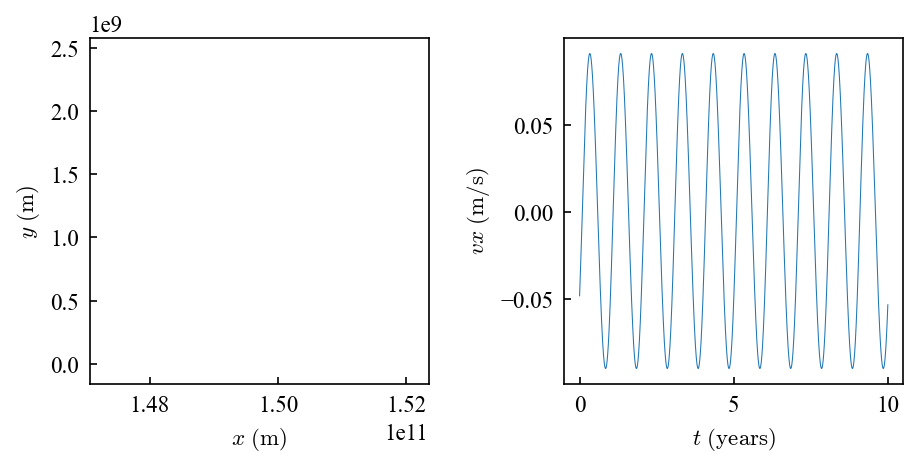

[[ 7.36720505  8.62772057 -0.17585501]
 [ 7.36729083  8.62785507 -0.17585502]
 [ 7.36737639  8.62798974 -0.17585502]
 ...
 [ 7.36345703  8.62230047 -0.17585483]
 [ 7.36355219  8.62242814 -0.17585484]
 [ 7.36364713  8.62255599 -0.17585484]]
[2.73791152e-04 5.47582304e-04 8.21373456e-04 ... 9.99940045e+00
 9.99967424e+00 9.99994803e+00]
Xs [3.99242787e+08 3.99306440e+08 3.99370094e+08 ... 2.69930815e+09
 2.69937177e+09 2.69943539e+09]
Ys [-1.59958364e+08 -1.59883820e+08 -1.59809274e+08 ...  2.57773262e+09
  2.57780712e+09  2.57788162e+09]


In [12]:
xmin, xmax = np.min(pos[:,0,0]), np.max(pos[:,0,0])
ymin, ymax = np.min(pos[:,0,1]), np.max(pos[:,0,1])

def plot_vx_tt(xt, vt, tt, xlab1='$x$', ylab1='$y$', xlab2='$x$', ylab2='$z$', lw=0.5, 
                    xlims=[-1.1, 1.1], ylims=[-1.1, 1.1], xlims2=None, ylims2=None, figsize=(7,3)):
    '''
    Helper function to plot trajectory in the x-y and x-z projections using Matplotlib 
    
    Parameters: 
        xt - arrays of coordinates [shape (nsteps,3)] to plot
        lw - controls width of the plotted lines (must be >0)
    Returns: None
    '''
    fig, ax = plt.subplots(1, 2, figsize=figsize) # define sub-panels
    fig.subplots_adjust(wspace=0.4)

    ax[0].plot(xt[:,0], xt[:,1], lw=lw)
    ax[0].set_xlim(xlims) # set x, and y axes limits 
    ax[0].set_ylim(ylims)
    ax[0].set_ylabel(ylab1) # add labels to axes
    ax[0].set_xlabel(xlab1)

    ax[1].plot(tt, vt[:,1]-np.mean(vt[:,1]), lw=lw)
    if xlims2 is not None: 
        ax[1].set_xlim(xlims2)
    if ylims2 is not None: 
        ax[1].set_ylim(ylims2)

    ax[1].set_xlabel(xlab2)
    ax[1].set_ylabel(ylab2)
    plt.show()
    
plot_vx_tt(pos[:,0]/AU, velos[:,0]/100, times/(yr), xlab1=r'$x\rm\ (m)$', ylab1=r'$y\rm\ (m)$', 
                 xlab2=r'$t\rm\ (years)$', ylab2=r'$vx\rm\ (m/s)$', xlims=[rmin/100,rmax/100], ylims=[ymin/100,ymax/100])
                    #xlims2=[tmin/yr,tmax/yr]
print(velos[:,0]/100)
print(times/yr)
print('Xs',pos[:,0,0]/100)
print('Ys', pos[:,0,1]/100)



Mercury :


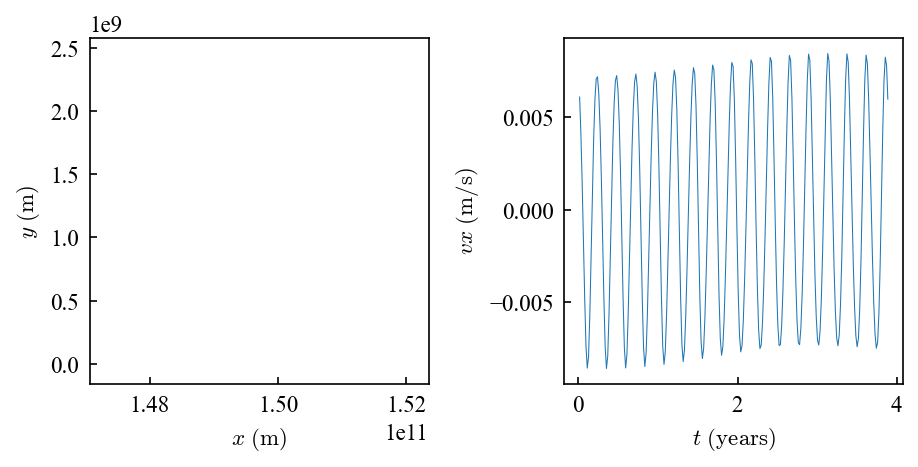

Venus :


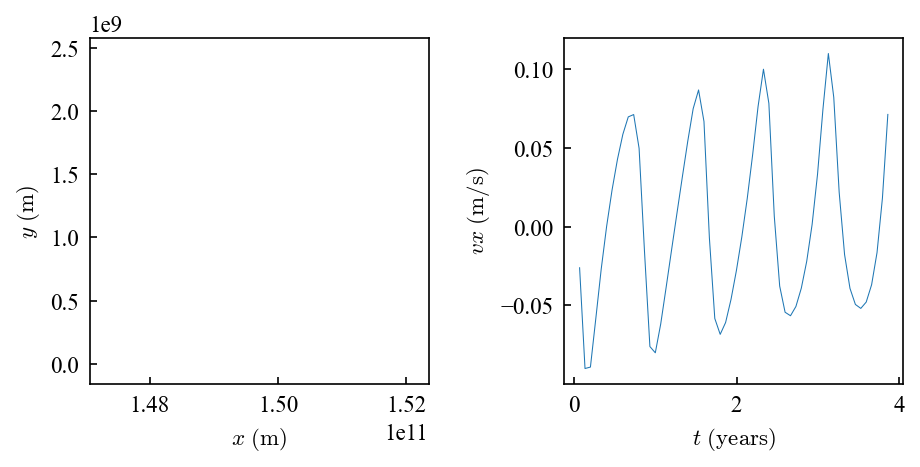

Mars :


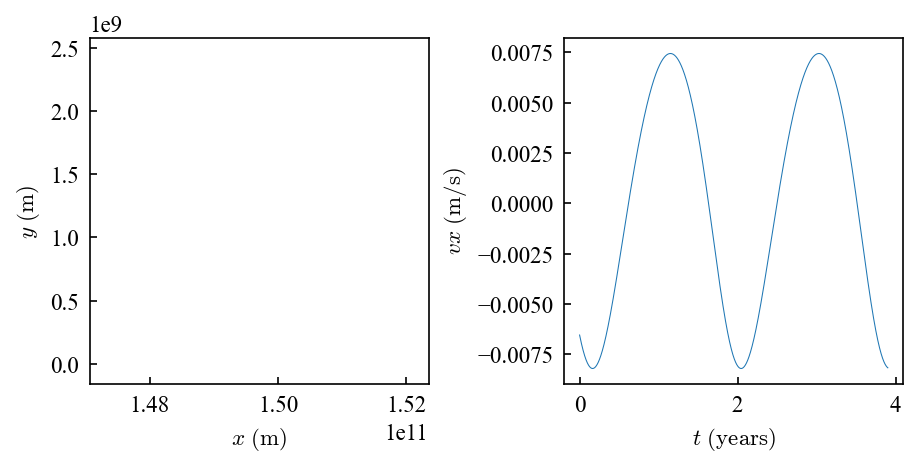

Jupiter :


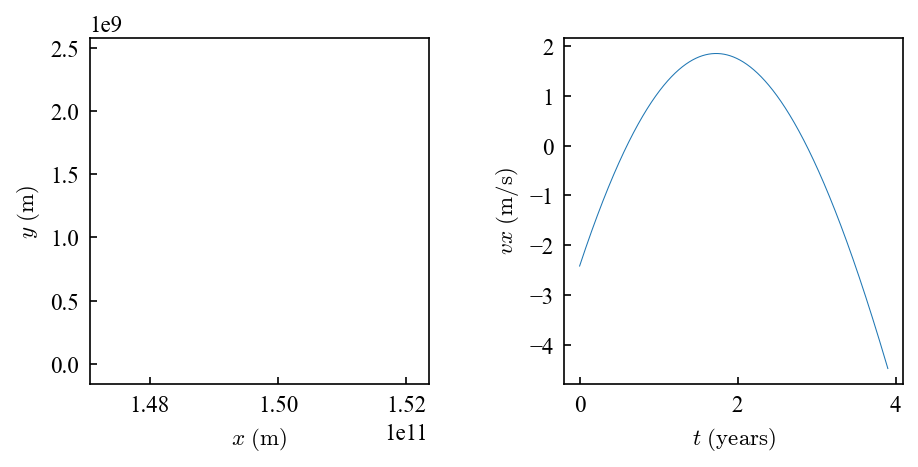

Saturn :


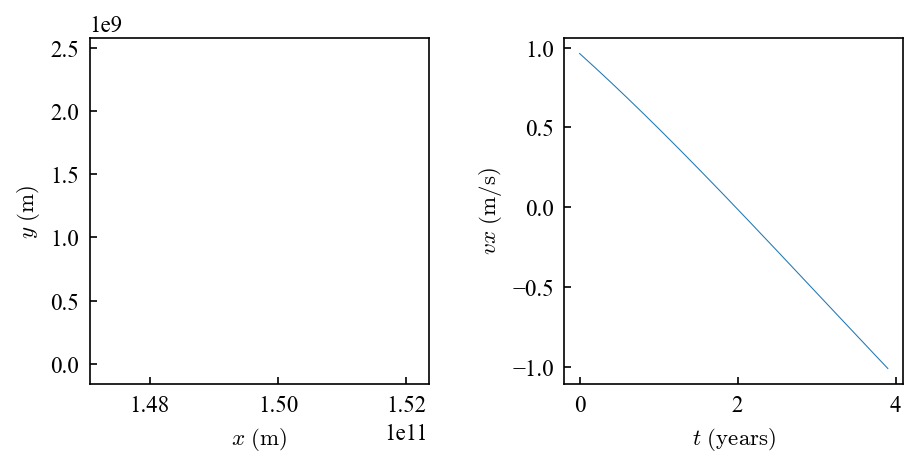

Uranus :


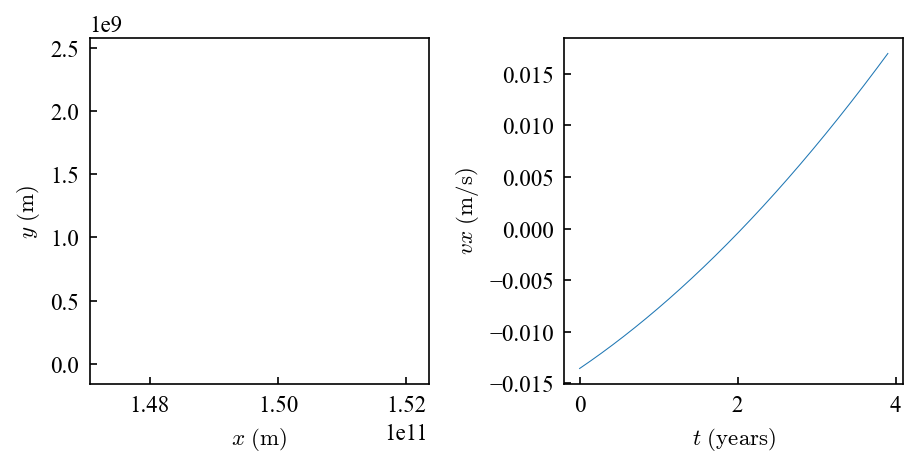

Neptune :


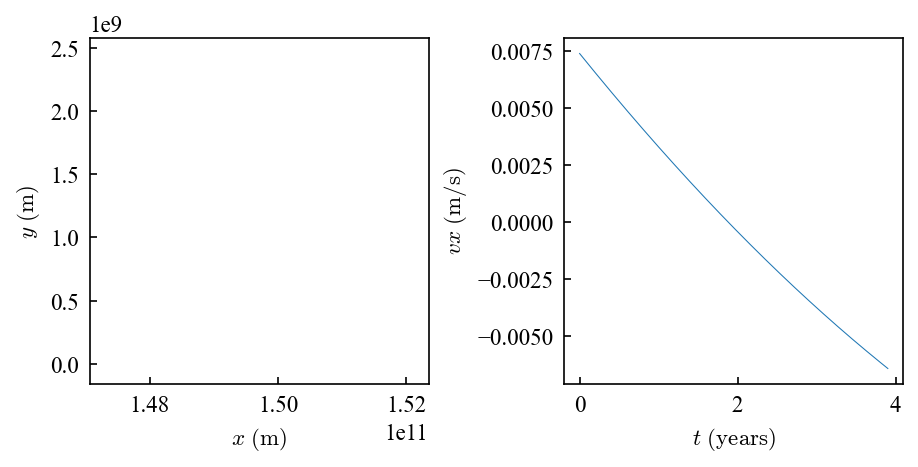

In [13]:

plist  = ['Sun','Mercury', 'Venus', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
day = [0, 1408*3600, 5832*3600,25*3600,10*3600,11*3600,17*3600,16*3600]
out = read_solsys_bodies(plist)

def plot_planets(planet, nsteps):
    two_bodies = [plist[0], planet]
    for j, b in enumerate (two_bodies):
        x[j,0] = out[b]['x']
        x[j,1] = out[b]['y']
        x[j,2] = out[b]['z']
        v[j,0] = out[b]['vx']
        v[j,1] = out[b]['vy']
        v[j,2] = out[b]['vz']
        m[j] = out[b]['mass']    
    times, pos, velos = nbody_integrate(x,v,m,dt,nsteps, acc_nbody(x,m,G = 6.67259e-08))
    return plot_vx_tt(pos[:,0]/AU, velos[:,0]/100, times/(yr), xlab1=r'$x\rm\ (m)$', ylab1=r'$y\rm\ (m)$', 
                 xlab2=r'$t\rm\ (years)$', ylab2=r'$vx\rm\ (m/s)$', xlims=[rmin/100,rmax/100], ylims=[ymin/100,ymax/100])

    

for w, p in enumerate (zip(plist, day)):
    if w >= 1:
        print(p[0],':')
        orbital_period = (2*np.pi)*pos[0,1,0]**(3/2)/(np.sqrt(G*(m[0]+m[1])))
        dt = 0.1*p[1]
        tend = 10*orbital_period
        nsteps = int(tend/dt)
        plot_planets(p[0], nsteps)



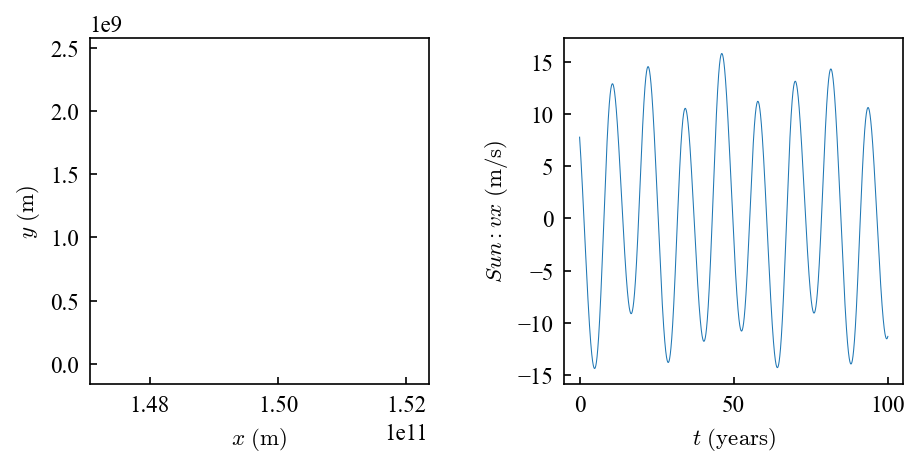

In [14]:
bodies  = ['Sun', 'Jupiter', 'Saturn']
x,v = np.empty((3,3)), np.empty((3,3))
m = np.empty((3))

for i,b in enumerate (bodies):
    x[i,0] = out[b]['x']
    x[i,1] = out[b]['y']
    x[i,2] = out[b]['z']
    v[i,0] = out[b]['vx']
    v[i,1] = out[b]['vy']
    v[i,2] = out[b]['vz']
    m[i] = out[b]['mass']

#for every component of x, vx, and m 
#v = out['Sun']['vx'], out['Sun']['vy'], out['Sun']['vz'], out['Earth']['vx'], out['Earth']['vy'], out['Earth']['vz']
dt = 0.1*86400
tend = 100*365.24*86400
nsteps = int(tend/dt)
times, pos, velos= nbody_integrate(x,v,m,dt,nsteps, acc_nbody(x,m,G = 6.67259e-08))
#print(times.shape)


def plot_sun(xt, vt, tt, xlab1='$x$', ylab1='$y$', xlab2='$x$', ylab2='$z$', lw=0.5, 
                    xlims=[-1.1, 1.1], ylims=[-1.1, 1.1], xlims2=None, ylims2=None, figsize=(7,3)):
    '''
    Helper function to plot trajectory in the x-y and x-z projections using Matplotlib 
    
    Parameters: 
        xt - arrays of coordinates [shape (nsteps,3)] to plot
        lw - controls width of the plotted lines (must be >0)
    Returns: None
    '''
    fig, ax = plt.subplots(1, 2, figsize=figsize) # define sub-panels
    fig.subplots_adjust(wspace=0.4)

    ax[0].plot(xt[:,0], xt[:,1], lw=lw)
    ax[0].set_xlim(xlims) # set x, and y axes limits 
    ax[0].set_ylim(ylims)
    ax[0].set_ylabel(ylab1) # add labels to axes
    ax[0].set_xlabel(xlab1)

    ax[1].plot(tt, vt[:,0]-np.mean(vt[:,0]), lw=lw)
    if xlims2 is not None: 
        ax[1].set_xlim(xlims2)
    if ylims2 is not None: 
        ax[1].set_ylim(ylims2)

    ax[1].set_xlabel(xlab2)
    ax[1].set_ylabel(ylab2)
    plt.show()
    
plot_sun(pos[:,0]/AU, velos[:,0]/100, times/(yr), xlab1=r'$x\rm\ (m)$', ylab1=r'$y\rm\ (m)$', 
                 xlab2=r'$t\rm\ (years)$', ylab2=r'$Sun: vx \rm\ (m/s)$', xlims=[rmin/100,rmax/100], ylims=[ymin/100,ymax/100])
                    #xlims2=[tmin/yr,tmax/yr]

### <font color='blue'>3. (8 points)  Integrating orbits of planets in the <a href="http://www.openexoplanetcatalogue.com/planet/Gliese%20876%20e/">exoplanet system GJ 876</a></font>

#### Background info:
GJ876 is a red dwarf star for which a series of precise radial motion measurements exists. Modelling of these motions indicates that it has at least two planets (quite likely three) orbiting around it. The two planets have periods of $\approx 60$ and $\approx 30$ days and are locked in a 2:1 mean motion resonance. 
Cartesian coordinates, velocities, and masses of the stars for one of the best fitting models are presented in Table 3 of <a href="http://adsabs.harvard.edu/abs/2005ApJ...622.1182L">Laughlin et al. 2005</a> and are available in this <a href="https://github.com/a-kravtsov/a330f17/blob/master/data/gj876.dat">file.</a> The code snippet below reads it in cgs units. 
    
#### Tasks: 


**3a. (7 points).** Initialize the three body system (star and two planets) with these coordinates and velocities as initial conditions using data read in the code snippet below. Integrate them forward for 3320 days with the $N$-body code you implemented in the exercise 1. 

Record positions and velocities of the planets and the star. Make a scatter plot of $x$ and $y$ coordinates (converted to the astronomical unit AU) of the star and planets in half-day intervals. Plot the $z$-component of velocity of the star (in meters/sec) as a function of time. Repeat the calculation with different step sizes $\Delta t$ and make sure that you use step size value for which results do not change if step sizes was larger or smaller. 

Compare to Figures 1 and 2 in <a href="https://ui.adsabs.harvard.edu/abs/2005ApJ...622.1182L/abstract">Laughlin et al. 2005</a> reproduced below. Correct calculation should reproduce the main features you can see in the figures (without the straight lines in the first figure and without  measurement points in the second figure, of course). Make sure you set the point size sufficiently small when making the scatter plot to compare to the First figure. 

**3b. (1 points).** repeat the calculation with the 1st order Euler scheme for the same step size and make the same plots as in 3a. Discuss whether the plots in this case agree with the figures in Laughlin et al. (2005). 

In [15]:
def read_g876():
    """
    reading initial positions of Gliese 876 and its planets b and c from Table 3 of Laughlin et al. 2005

    Returns: 
        mp in g, xp, yp, zp in cm, vxp, vyp, vzp is in cm/s 
    """
    
    data_file = 'https://astro.uchicago.edu/~andrey/classes/a211/data/gj876.dat'
    name = np.loadtxt(data_file, usecols=[0], unpack=True, dtype=str)
    mp, xp, yp, zp, vxp, vyp, vzp = np.loadtxt(data_file, usecols=(1,2,3,4,5,6,7), unpack=True)
    return name, mp, xp, yp, zp, vxp, vyp, vzp 

In [16]:
name, mp, xp, yp, zp, vxp, vyp, vzp = read_g876()

print(name, mp, xp, yp, zp, vxp, vyp, vzp)

['Star' 'Planetc' 'Planetb'] [6.36515181e+32 1.13341374e+30 3.59700414e+30] [ 0.00000000e+00 -1.37393700e+12  2.89833447e+12] [ 0.0000000e+00  6.6185776e+11 -1.3485766e+12] [0. 0. 0.] [   -3974.15664 -2532174.78     1501141.65   ] [   -9012.47643 -5262209.95     3252940.14   ] [0. 0. 0.]


Figures from Laughlin et al. 2005 paper that we aim to reproduce (approximately) in this exercise. 

<center>
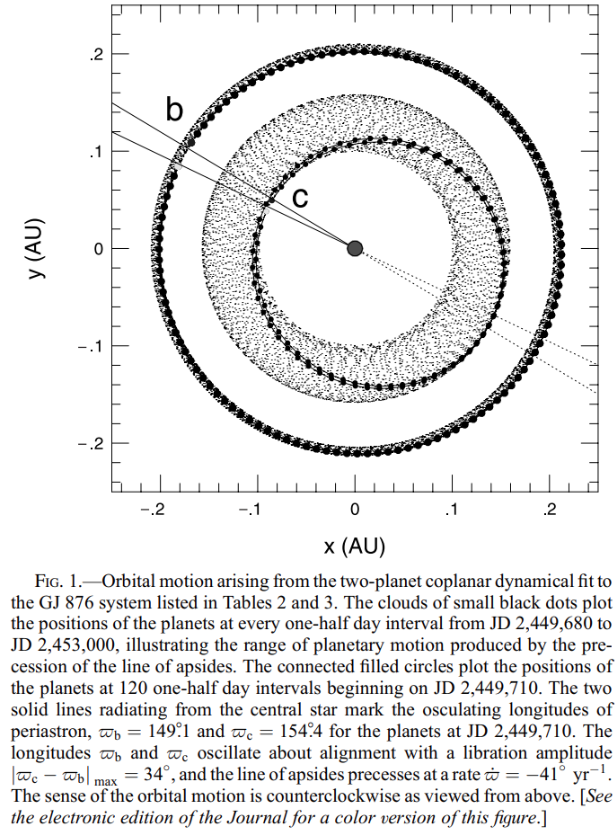</img>
</center>



<center>
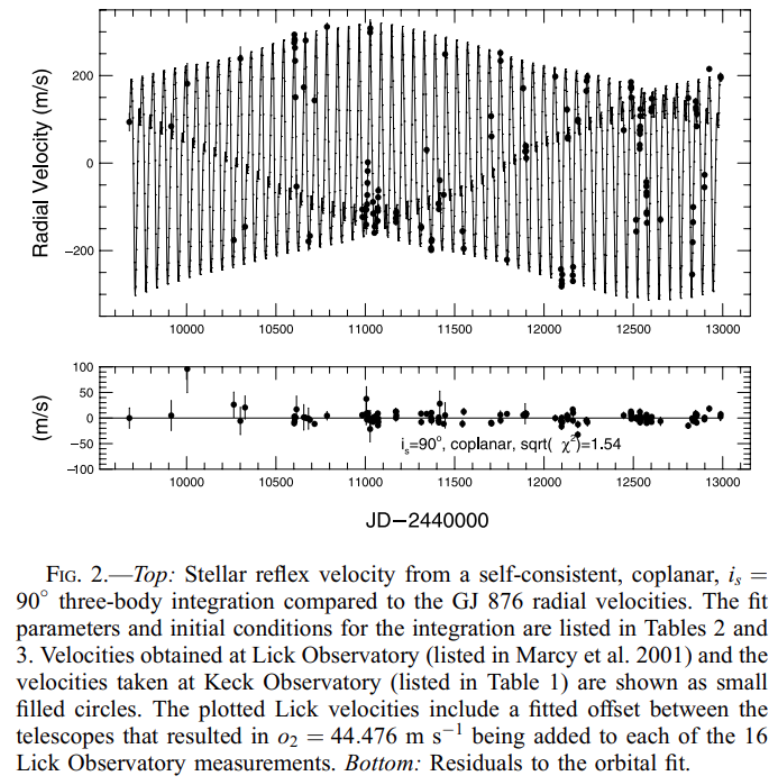</img>
</center>

In [17]:
#new question -->


In [18]:
"""def twobody_int(p, n, nbody_integrate=None):
    tt,xt,vt = nbody_integrate(x, *args)
    planets = ['Sun','Mercury', 'Venus', 'Earth', 'Mars', 
                'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto' ]
    bodies  = ['Sun', planets[p]]
    n = len(bodies)
    x,v = np.empty((n,3)), np.empty((n,3))
    m = np.empty((n))
    
    for i,b in enumerate (bodies):
        x[i,0] = out[b]['x']
        x[i,1] = out[b]['y']
        x[i,2] = out[b]['z']
        v[i,0] = out[b]['vx']
        v[i,1] = out[b]['vy']
        v[i,1] = out[b]['vz']
        m[0] = out[b]['mass']
        m[1] = out[b]['mass']

   #for every component of x, vx, and m 
#v = out['Sun']['vx'], out['Sun']['vy'], out['Sun']['vz'], out['Earth']['vx'], out['Earth']['vy'], out['Earth']['vz']

print(twobody_int(3,2, nbody_integrate(x,v,m,1.85, 200, acc_nbody(x,m,G = 6.67259e-08)))) """

"def twobody_int(p, n, nbody_integrate=None):\n    tt,xt,vt = nbody_integrate(x, *args)\n    planets = ['Sun','Mercury', 'Venus', 'Earth', 'Mars', \n                'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto' ]\n    bodies  = ['Sun', planets[p]]\n    n = len(bodies)\n    x,v = np.empty((n,3)), np.empty((n,3))\n    m = np.empty((n))\n    \n    for i,b in enumerate (bodies):\n        x[i,0] = out[b]['x']\n        x[i,1] = out[b]['y']\n        x[i,2] = out[b]['z']\n        v[i,0] = out[b]['vx']\n        v[i,1] = out[b]['vy']\n        v[i,1] = out[b]['vz']\n        m[0] = out[b]['mass']\n        m[1] = out[b]['mass']\n\n   #for every component of x, vx, and m \n#v = out['Sun']['vx'], out['Sun']['vy'], out['Sun']['vz'], out['Earth']['vx'], out['Earth']['vy'], out['Earth']['vz']\n\nprint(twobody_int(3,2, nbody_integrate(x,v,m,1.85, 200, acc_nbody(x,m,G = 6.67259e-08)))) "